# Лабораторная работа
Горской Ксении, 18ИАД

Данные для работы: https://archive.ics.uci.edu/ml/datasets/Firm-Teacher_Clave-Direction_Classification

Данные состоят из 16 двоичных входов и одного «четырехбитового» однострочного классификационного выхода. 16-разрядные входы представляют собой двоично-значные векторы атаки. 1 указывает на существенное присутствие (0, отсутствие) начала (начало записи) в определенное временное окно во время одной полосы 4/4 времени музыки (не ограничиваясь перкуссионными, следовательно, начальными векторами без длительности), квантованными до 16-й ноты подразделения. Каждый вектор имеет 16 позиций, в которых может быть или не быть начало. Выходные классы (слева направо: нейтральный, обратный ключ, передний ключ и бессвязный) определялись с помощью теоретико-музыкальной / этномузыкологической части диссертационных исследований, основанных на двух двойных слепых тестах на прослушивание и неформальных интервью с четырьмя профессиональными мастерами-музыкантами, а также десятилетиями изучения музыки.

# Задание №1

Импортируем необходимые библиотеки:

In [1]:
import numpy as np #для работы с большими многомерными массивами и матрицами, высокоуровневыми математическими функциями для операций с этими массивами.
import pandas as pd #анализ и обработка данных
import matplotlib.pyplot as plt #визуализация данных

# Чтение данных

In [2]:
data = pd.read_csv('ClaveVectors_Firm-Teacher_Model.txt', sep=' ', engine = 'python', header = None)
#разделитель пробел, заголовок отсутствует
data.columns = [u'r1', u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9', u'r10', u'r11', u'r12', u'r13', u'r14', u'r15', u'r16', u'neutral', u'reverse clave', u'forward clave', u'incoherent']
#выведем данные
data

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,neutral,reverse clave,forward clave,incoherent
0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
5,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1
6,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1
8,1,1,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1
9,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1


Выведем размер считанных данных

In [3]:
print(data.shape)

(10800, 20)


Посмотрим заголовки колонок, которые сами задавали

In [4]:
print(data.columns)

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11',
       'r12', 'r13', 'r14', 'r15', 'r16', 'neutral', 'reverse clave',
       'forward clave', 'incoherent'],
      dtype='object')


Распечатаем начало наших данных(первые пять строчек таблицы)

In [5]:
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,neutral,reverse clave,forward clave,incoherent
0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1


Выведем последние 5 строк таблицы

In [6]:
data.tail()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,neutral,reverse clave,forward clave,incoherent
10795,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
10796,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
10797,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0
10798,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0
10799,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0


Для построения матрицы рассеяния будем использователь метод scatter_matrix из библиотеки pandas. Параметром alpha задаем размер точки на графике, остальные интуитивно понятны.

C:\Users\ksgo0816\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


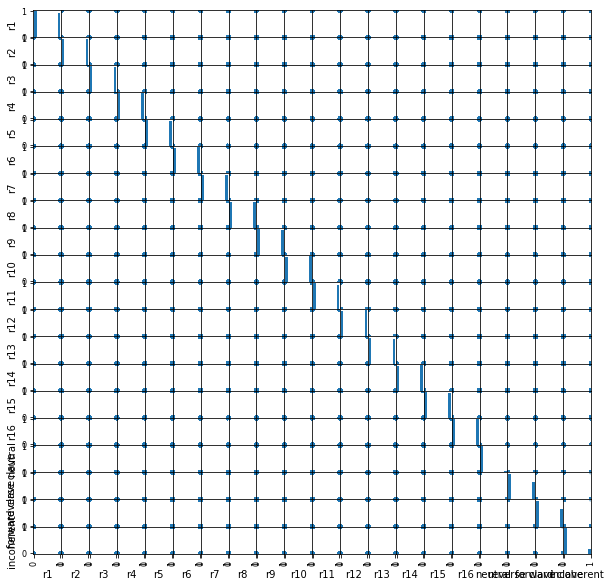

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.5, figsize = (10, 10))
pass

# Предобработка данных

Последние четыре колонки наших данных являются выходными классами (3 - нейтральный, 2 - обратный клаве, 1 - прямой клаве, 0 - некогерентный) в однократной кодировке. Так, задача сводится к определению класса. Сейчас мы можем это видеть в последних четырех колонках. Где стоит значение 1, к тому классу и относится. Для простоты работы добавим один столбец, в котором будет находиться номер наиболее подходящего класса, значения которого будут от 0 до 3. Тогда мы удалим из наших данных последние 4 столбца, вместо которого будет новый добавленный столбец.

In [8]:
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,neutral,reverse clave,forward clave,incoherent
0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [9]:
data['class']=0
for i in range(0,len(data)):
    if (data['neutral'][i]):
        data['class'][i]=3;
    if (data['reverse clave'][i]):
        data['class'][i]=2;
    if (data['forward clave'][i]):
        data['class'][i]=1;
    if (data['incoherent'][i]):
        data['class'][i]=0;

In [10]:
data = data.drop(['neutral','reverse clave','forward clave','incoherent'], axis = 1)
data.shape

(10800, 17)

In [11]:
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,class
0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0
1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0
2,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0
3,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0
4,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [12]:
data.tail()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,class
10795,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3
10796,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,3
10797,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,3
10798,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,3
10799,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,3


In [13]:
data['class']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
10770    3
10771    3
10772    3
10773    3
10774    3
10775    3
10776    3
10777    3
10778    3
10779    3
10780    3
10781    3
10782    3
10783    3
10784    3
10785    3
10786    3
10787    3
10788    3
10789    3
10790    3
10791    3
10792    3
10793    3
10794    3
10795    3
10796    3
10797    3
10798    3
10799    3
Name: class, Length: 10800, dtype: int64

Посмотрим основные статистические характеристики данных:

In [14]:
data.describe()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,class
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,0.482130,0.497037,0.486944,0.500833,0.492130,0.504444,0.502037,0.505926,0.490648,0.509167,0.479630,0.502963,0.489537,0.509074,0.492778,0.502593,1.308056
std,0.499704,0.500014,0.499853,0.500022,0.499961,0.500003,0.500019,0.499988,0.499936,0.499939,0.499608,0.500014,0.499914,0.499941,0.499971,0.500016,0.787090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
data.count(axis=0)

r1       10800
r2       10800
r3       10800
r4       10800
r5       10800
r6       10800
r7       10800
r8       10800
r9       10800
r10      10800
r11      10800
r12      10800
r13      10800
r14      10800
r15      10800
r16      10800
class    10800
dtype: int64

Можно видеть, что в таблице данных нет пропущенных значений и все признаки числовые
(векторизация не нужна)

Вычислим корелляцию между признаками

In [16]:
#Сorrelation matrix
#Чем значением ближе к нулю, тем меньше корреляция
corrTable = data.corr()
corrTable

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,class
r1,1.000000,-0.023746,0.049856,-0.002905,-0.015760,0.032006,-0.021535,0.036190,0.022313,0.038835,-0.036510,0.009292,0.024088,-0.026224,0.043034,-0.024831,0.185987
r2,-0.023746,1.000000,-0.047023,0.046492,0.024910,-0.027727,0.034099,-0.023636,0.035637,-0.007856,0.053508,-0.034040,-0.018091,0.032336,-0.023051,0.033735,-0.262738
r3,0.049856,-0.047023,1.000000,-0.005514,0.006259,0.034134,-0.020456,0.032730,-0.033839,0.045317,-0.016083,0.025164,0.019464,-0.001564,0.023893,-0.001532,0.140971
r4,-0.002905,0.046492,-0.005514,1.000000,0.008546,-0.017979,0.032031,0.008685,0.014849,-0.027813,0.039545,0.009805,-0.004040,0.024603,0.007988,-0.005749,-0.084062
r5,-0.015760,0.024910,0.006259,0.008546,1.000000,-0.032643,0.028772,0.002224,0.032678,-0.010085,0.014002,-0.004167,0.021530,0.024922,-0.017083,0.025826,-0.075847
r6,0.032006,-0.027727,0.034134,-0.017979,-0.032643,1.000000,-0.032630,0.035825,-0.025580,0.032622,-0.010017,0.019578,0.029268,-0.008311,0.031985,-0.020047,0.130053
r7,-0.021535,0.034099,-0.020456,0.032031,0.028772,-0.032630,1.000000,-0.023013,0.027674,-0.019523,0.028709,0.001828,-0.007879,0.041785,0.004133,0.019609,-0.128534
r8,0.036190,-0.023636,0.032730,0.008685,0.002224,0.035825,-0.023013,1.000000,-0.024784,0.040718,0.000113,0.008449,0.030072,-0.022443,0.028324,0.020311,0.124191
r9,0.022313,0.035637,-0.033839,0.014849,0.032678,-0.025580,0.027674,-0.024784,1.000000,-0.041153,0.044283,0.002519,0.000720,0.007194,-0.009347,0.038808,-0.101754
r10,0.038835,-0.007856,0.045317,-0.027813,-0.010085,0.032622,-0.019523,0.040718,-0.041153,1.000000,-0.071732,0.025266,-0.007397,-0.008298,0.021937,-0.042510,0.124019


In [17]:
import seaborn as sns

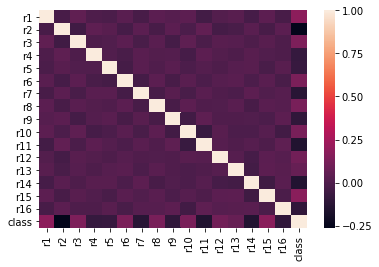

In [18]:
ax = sns.heatmap(corrTable)

In [17]:
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if (i != j):
            print(i,j, corrTable[i][corrTable.index==j].values[0])

Получив таблицу корреляции, стало видно, что у нас нет столбцов, которые сильно коррелируют, исключать данные не придется и можно работать с ними дальше.

# Нормализация данных

In [18]:
dataCh = data.drop(['class'], axis = 1)
for j in dataCh.columns:
    print(dataCh[j].unique())

[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]


In [19]:
data.describe()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,class
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,0.482130,0.497037,0.486944,0.500833,0.492130,0.504444,0.502037,0.505926,0.490648,0.509167,0.479630,0.502963,0.489537,0.509074,0.492778,0.502593,1.308056
std,0.499704,0.500014,0.499853,0.500022,0.499961,0.500003,0.500019,0.499988,0.499936,0.499939,0.499608,0.500014,0.499914,0.499941,0.499971,0.500016,0.787090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Нормализация не нужна, т.к. значения всех данных принимают либо 0, либо 1.

# Разделение на тестовую и обучающую выборки

In [20]:
Y = data['class']
X = data.drop(['class'], axis = 1)

In [21]:
print(X.shape)

(10800, 16)


In [22]:
print(Y.shape)

(10800,)


In [23]:
feature_names = X.columns
feature_names

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11',
       'r12', 'r13', 'r14', 'r15', 'r16'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
#30% тестовая выборка, 70% обучающая выборка
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7560 3240


In [25]:
N_train + N_test

10800

# KNN

Метод ближайшего соседа.
Для метода knn наиболее существенными являются следующие параметры:
n_neighbors - число соседей, класс которых учитывается при принятии решения
metric - метрика, с помощью которой вычисляется расстрояние между точками (по дефолту, используется Евклидово расстояние)
weights - алгоритм, с помощью которого вычисляется значимость того или иного соседа (по умолчанию, все соседи имеют одинаковый вес(в таком случае возможна неоднозначность при числе n_neighbors кратном числу классов), так же, часто вес считается на основании расстояния, но можно задавать и кастомную функцию)

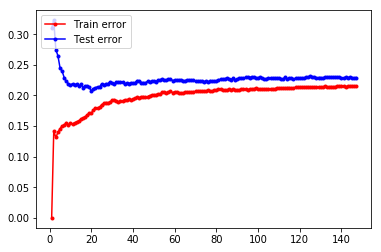

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
errs_train, errs_test = [],[]
for k in range(1,148):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    errs_train.append(np.mean(knn.predict(X_train)!=y_train))
    errs_test.append(np.mean(knn.predict(X_test)!=y_test))

#Построим график зависимости ошибки от количества соседей, которых учитывает алгоритм.
%matplotlib inline
plt.plot(range(1,148), errs_train, '.-r', label = 'Train error')
plt.plot(range(1,148), errs_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
pass

Наивысшая точность для тестовой выборки достигается при к = 20

Осуществим классификацию и вычислим значение ошибки

In [31]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

#Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.17076719576719576 0.20709876543209876


Мы получили, что ошибка на обучающей выборке немного меньше, чем ошибка на тестовой выборке (разница примерно в 3%).

С помощью confusion_matrix построим матрицу, которая позволяет визуализировать прогнозы классификатора. Элемент матрицы (i, j) равна числу объектов, которые, принадлежат группе i, но, по прогнозам, находятся в группе j.

In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 126  190  249    0]
 [  23 1214   34    0]
 [  20   41 1222    0]
 [  10   55   49    7]]


Подбор параментров.
Найдем такое значение параметра k, при котором значение ошибки будет минимальным.

In [33]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.20026455026455026 15


Подбор параметров показывает, что минимальная ошибка достигается при к = 15

In [30]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16164021164021164 0.21790123456790123


# Support Vector Classifier

Идею метода удобно проиллюстрировать на следующем простом примере: даны точки на плоскости, разбитые на два класса. Проведем линию, разделяющую эти два класса. Далее, все новые точки (не из обучающей выборки) автоматически классифицируются следующим образом:
точка выше прямой попадает в класс A,
точка ниже прямой — в класс B.

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.14867724867724869 0.17314814814814813


Подбор параметров

In [32]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Users\ksgo0816\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ksgo0816\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.13796296296296295 10.0


In [33]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16164021164021164 0.21790123456790123


# Random Forest

Random forest — алгоритм машинного обучения, заключающийся в использовании комитета (ансамбля) решающих деревьев. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств, предложенный Tin Kam Ho. Алгоритм применяется для задач классификации, регрессии и кластеризации.

In [34]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000) #n_estimators - количество деревьев
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.20092592592592592


In [35]:
size = len(X.columns)
size

16

Значимость признаков

In [36]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(size):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature '   r2' (0.084614)
 2. feature '  r10' (0.079699)
 3. feature '   r1' (0.068259)
 4. feature '   r9' (0.066199)
 5. feature '  r15' (0.062398)
 6. feature '   r3' (0.062242)
 7. feature '   r6' (0.061180)
 8. feature '   r7' (0.060866)
 9. feature '  r14' (0.060656)
10. feature '  r11' (0.059608)
11. feature '  r16' (0.059038)
12. feature '   r8' (0.057827)
13. feature '  r12' (0.057024)
14. feature '   r4' (0.056751)
15. feature '   r5' (0.052876)
16. feature '  r13' (0.050762)


Можно заметить, что самый большой вклад в модели сыграл признак r2, но вцелом, все остальные признаки имеют тоже большую значимость.

In [37]:
print("feature sum: " , np.sum(rf.feature_importances_))

feature sum:  1.0


(-1, 16)

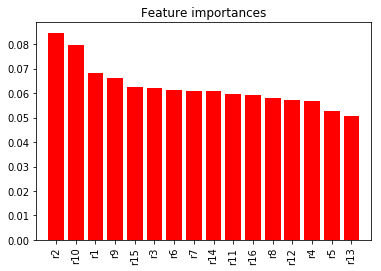

In [38]:
plt.title("Feature importances")
plt.bar(range(size), importances[indices[:size]], align = 'center', color = 'r')
plt.xticks(range(size), feature_names[indices[:size]], rotation = 90)
plt.xlim([-1, size])

# Extreme Random Trees

В экстремально случайных деревьях выбор признака, по которому поисходит ветвление выбирается абсолютно случайным образом.

In [39]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.20462962962962963


Наблюдается переобучение, т.к. значение ошибки на тестовой выборке (~ 0.2) больше, чем на обучающей (0.0).

# AdaBoost

Алгоритм AdaBoost — является мета-алгоритмом, в процессе обучения строит композицию из базовых алгоритмов обучения для улучшения их эффективности. AdaBoost является алгоритмом адаптивного бустинга в том смысле, что каждый следующий классификатор строится по объектам, которые плохо классифицируются предыдущими классификаторами. AdaBoost вызывает слабый классификатор в цикле. После каждого вызова обновляется распределение весов, которые отвечают важности каждого из объектов обучающего множества для классификации. На каждой итерации веса каждого неверно классифицированного объекта возрастают, таким образом новый классификатор «фокусирует своё внимание» на этих объектах.

In [40]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.21005291005291005 0.22006172839506172


# Gradient Boosted Trees

Обучаем Gradient boosted trees классификатор с параметром n_estimators(где n_estimators = количество деревьев).

In [41]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.08875661375661376 0.15339506172839507


В результате, можно заметить что лучший результат мы получили, используя метод GBT (ошибка на обучающей выборке примерно равна 0.09, а на тестовой выборке 0,15). Метод SVC также выдал нам неплохие результаты. А используя методы Random Forest и Extremely Randomized Trees мы получили практически одинаковые значения ошибок.

# Задание №2

In [26]:
#Код выше скомпилирован, имеем X и Y и разделили на тестовую и обучающую выборки (30% тестовая выборка, 70% обучающая выборка)
from sklearn.neural_network import MLPClassifier

Обучаем MLP классификатор с 1 скрытым слоем из 5 нейронов, активационная функция - логистическая сигмоидальная

In [33]:
mlp_model = MLPClassifier(hidden_layer_sizes = (5,), solver = 'lbfgs', activation = 'logistic', random_state = 5)
#hidden_layer_sizes - показывает количество нейронов на скрытом слое
#solver - решатель для оптимизации веса: ‘lbfgs’ является оптимизатором в семействе квази-ньютоновских методов.
#activation - функция активации для скрытых слоев: ‘logistic’ -> f(x) = 1 / (1 + exp(-x))
#random_state - если int, это число, используемое генератором случайных чисел
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем качество классификатора по величине ошибки

In [34]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.18624338624338624
Ошибка на тестовой выборке:  0.19537037037037036


Возможно наблюдается ситуация переобучения, так как ошибка на тестовой выборке больше ошибки на обучающей выборке.
Попробуем увеличить число нейронов в скрытом слое до 50:

In [35]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.09603174603174604
Ошибка на тестовой выборке:  0.14598765432098765


Можем видеть, что ошибки на обучающей и на тестовой выборке уменьшились. Попробуем увеличить число скрытых слоев нейронной сети.

Рассмотрим нейронную сеть с двумя скрытыми слоями, количество нейронов в первом слое равно 50, во втором - 30

In [128]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, 30), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Получим следующие значения ошибок:

In [129]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.07791005291005292
Ошибка на тестовой выборке:  0.14876543209876544


Таким образом, можем видеть, что ошибка на тестовой выборке уменьшилась.

#### Подбор гиперпараметров
Подберем оптимальное значение параметра регуляризации alpha

In [89]:
alpha_arr = np.logspace(-5, 5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от параметра alpha

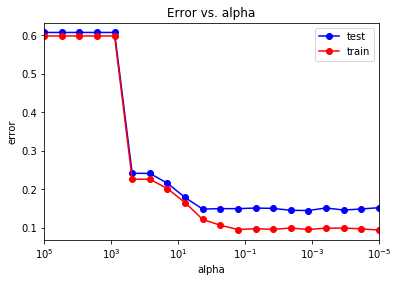

In [90]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Посмотрим на значения параметра alpha

In [91]:
print(alpha_arr)

[1.00000000e-05 3.35981829e-05 1.12883789e-04 3.79269019e-04
 1.27427499e-03 4.28133240e-03 1.43844989e-02 4.83293024e-02
 1.62377674e-01 5.45559478e-01 1.83298071e+00 6.15848211e+00
 2.06913808e+01 6.95192796e+01 2.33572147e+02 7.84759970e+02
 2.63665090e+03 8.85866790e+03 2.97635144e+04 1.00000000e+05]


По графику видно, что с уменьшением коэффициента alpha ошибка тестовой и тренировочной улучшается.

Минимальное значение ошибки:

In [92]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.09351851851851851 0.14444444444444443


Оптимальное значение alpha:

In [93]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.0012742749857031334


#### Классификатор при найденном оптимальном значении alpha:
Повторим обучение с исходными параметрами:

In [95]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.09523809523809523
0.14444444444444443


Эффект сохранился и ошибка не сильно уменьшилась.

#### Поиск оптимального количества нейронов

Проанализируем оптимальное количество нейронов для MLP классификатора с одним скрытым слоев.

In [118]:
neurons_arr = np.arange(5,200,30)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от количества нейронов

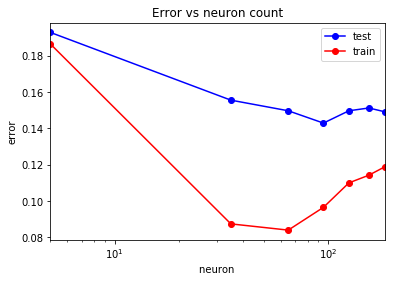

In [119]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.08386243386243386 0.14290123456790124


In [121]:
kol_neurons = neurons_arr[test_err == np.min(test_err)]
print(kol_neurons)

[95]


Анализируя график, можно сделать выводы, что при одном скрытом слое использование 95 нейронов дает нам минимальную тестовую ошибку. Судя по графику до было недообучение, а после переобучение.

Проанализируем оптимальное количество нейронов для MLP классификатора с двумя скрытыми слоями.

In [122]:
neurons_arr = np.arange(5,200,30)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, 50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от количества нейронов

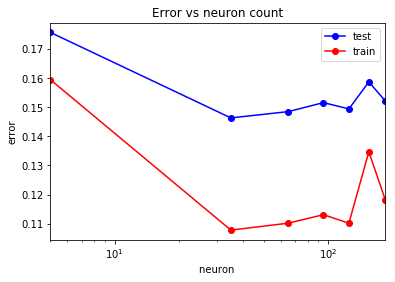

In [123]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [124]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1078042328042328 0.14629629629629629


In [125]:
kol_neurons = neurons_arr[test_err == np.min(test_err)]
print(kol_neurons)

[35]


Анализируя график, можно сделать выводы, что при двух слоях использование 35 нейронов дает нам минимальную тестовую ошибку.